In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Importing the dataset
df=pd.read_csv("Country-data.csv")

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
## Identifying the shape of the dataset
df.shape

(167, 10)

In [4]:
## Describing the numerical columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
## finding the datatypes of the provided dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
### Checking for null values
df.life_expec.isna().sum()

0

In [7]:
##Columns 
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='child_mort'>

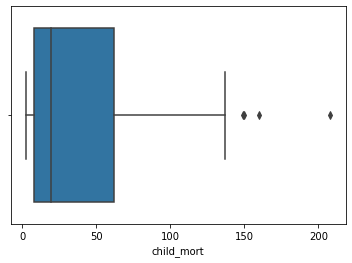

In [8]:
###Univariate analysis
sns.boxplot(df.child_mort)


<AxesSubplot:xlabel='exports'>

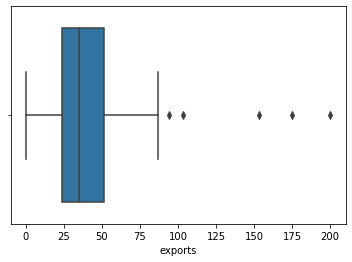

In [9]:
sns.boxplot(df.exports)

<AxesSubplot:xlabel='health'>

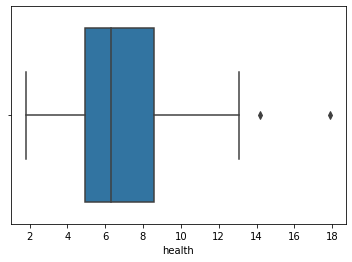

In [10]:
sns.boxplot(df.health)

<AxesSubplot:xlabel='imports'>

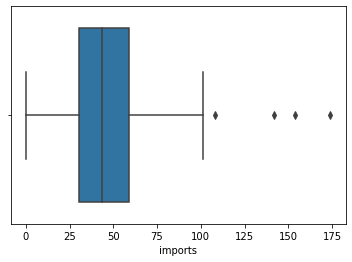

In [11]:
sns.boxplot(df.imports)

<AxesSubplot:xlabel='inflation'>

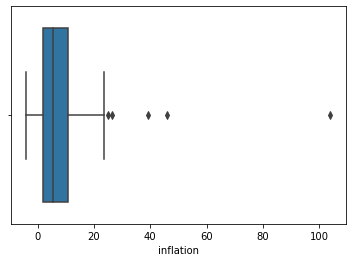

In [12]:
sns.boxplot(df.inflation)

<AxesSubplot:xlabel='life_expec'>

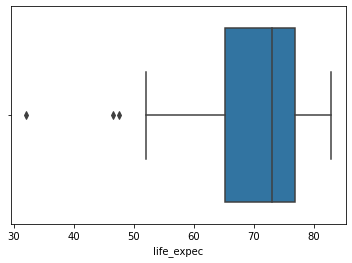

In [13]:
sns.boxplot(df.life_expec)

<AxesSubplot:xlabel='total_fer'>

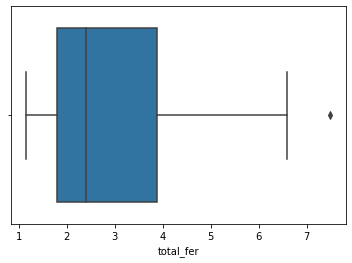

In [14]:
sns.boxplot(df.total_fer)

<AxesSubplot:xlabel='gdpp'>

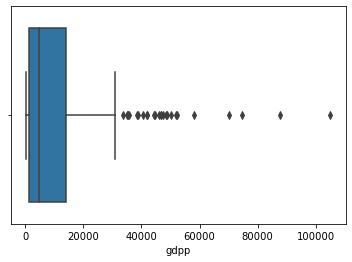

In [15]:
sns.boxplot(df.gdpp)

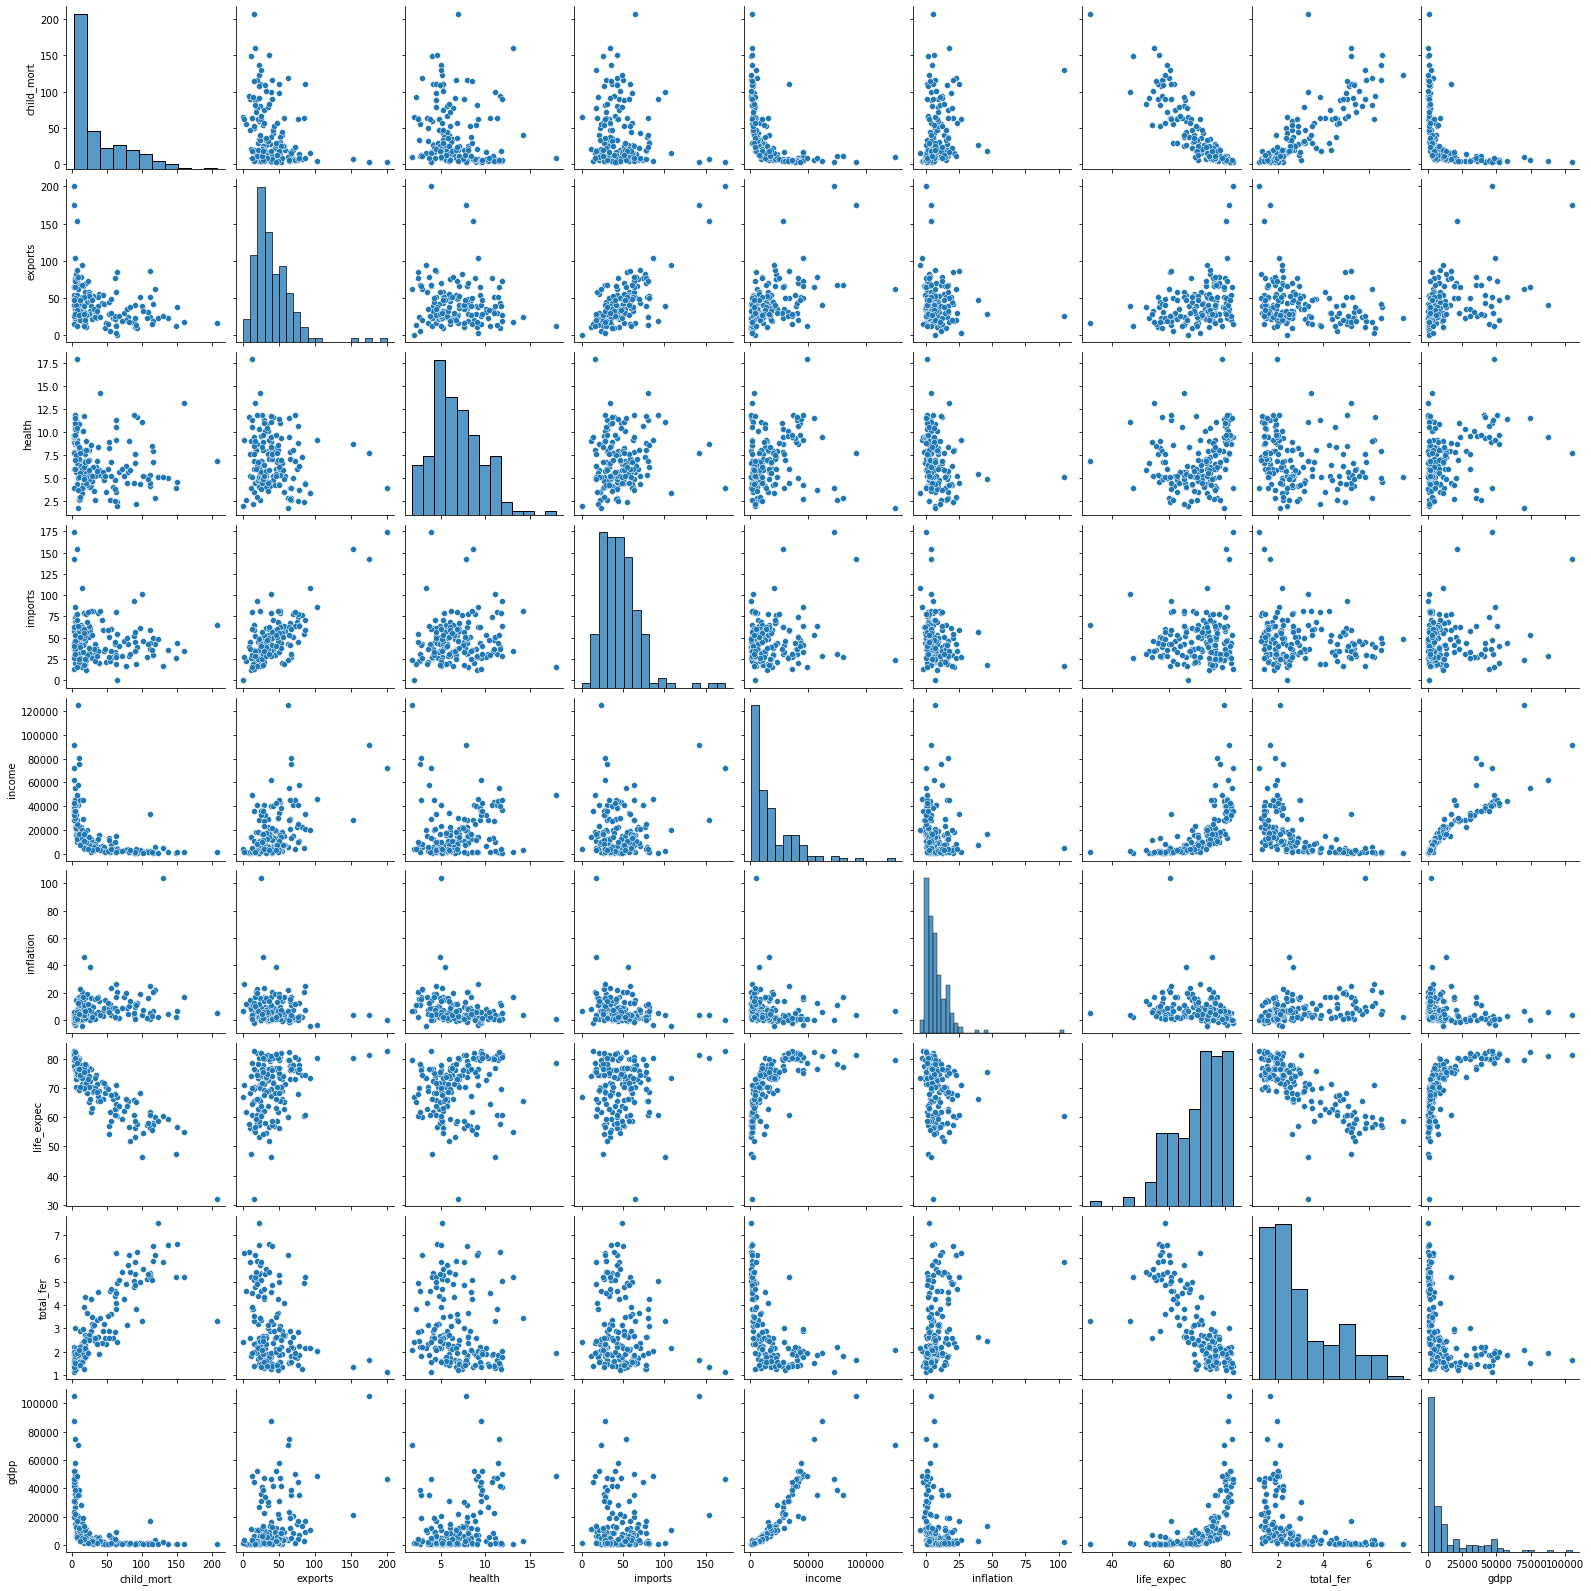

In [16]:
## Bivariate analysis
sns.pairplot(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])

<AxesSubplot:>

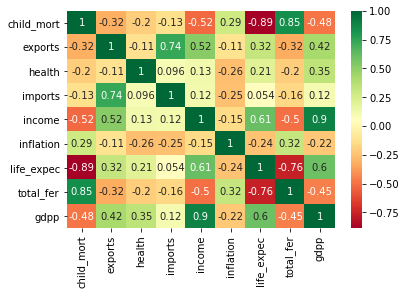

In [17]:
sns.heatmap(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].corr(),annot=True,cmap='RdYlGn')

In [18]:
df_new=df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans=KMeans(n_clusters=2)

In [21]:
kmeans=kmeans.fit(df_new)

In [22]:
## Visualising cluster centres
kmeans.cluster_centers_

array([[5.59375000e+00, 5.59687500e+01, 8.48375000e+00, 4.64593750e+01,
        4.89625000e+04, 3.85200000e+00, 8.00968750e+01, 1.88968750e+00,
        4.50906250e+04],
       [4.60155556e+01, 3.75866593e+01, 6.42029630e+00, 4.69923400e+01,
        9.60268889e+03, 8.71334815e+00, 6.82940741e+01, 3.19881481e+00,
        5.34899259e+03]])

In [23]:
##Assigning labels
labels=kmeans.labels_

In [24]:
## Calculating ssd for various cluster numbers
ssd=[]
for i in range(2,9):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(df_new)
    ssd.append(kmeans.inertia_)
    

In [25]:
ssd

[36528387934.322105,
 21710210039.754147,
 14610713446.535133,
 10655378083.862547,
 7655725089.094505,
 5353767457.732319,
 4260514816.1154]

In [26]:
ssd=pd.DataFrame(ssd)

In [27]:
ssd

,0
0,3.652839e+10
1,2.171021e+10
2,1.461071e+10
3,1.065538e+10
4,7.655725e+09
5,5.353767e+09
6,4.260515e+09


Text(0.5, 1.0, 'Elbow curve')

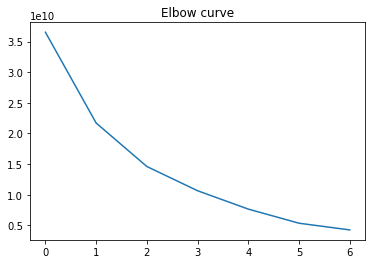

In [28]:
### Elbow curve
plt.plot(ssd.index,ssd[0])
plt.title("Elbow curve")

### Silhoutte score analysis

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
## Calclating silhouette score for the clusters
sscore=[]
for i in range(2,9):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(df_new)
    sscore.append(silhouette_score(df_new.values,kmeans.labels_))

In [31]:
sscore=pd.DataFrame(sscore)

In [32]:
sscore

,0
0,0.725631
1,0.700351
2,0.610930
3,0.572716
4,0.590137
5,0.594425
6,0.596483


Text(0.5, 1.0, 'Silhouete score')

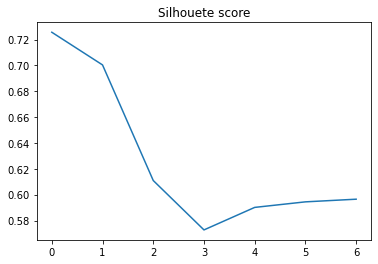

In [33]:
plt.plot(sscore.index,sscore[0])
plt.title("Silhouete score")

In [34]:
df['Labels']=labels

In [35]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [36]:
df.Labels.value_counts()

1    135
0     32
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='gdpp'>

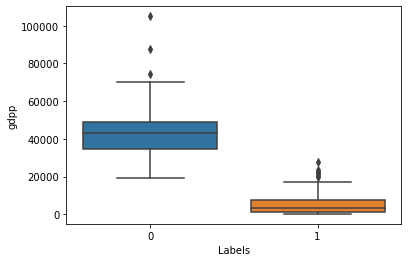

In [37]:
## Plotting boxplot for gdpp
sns.boxplot(x='Labels',y='gdpp',data=df)

<AxesSubplot:xlabel='Labels', ylabel='income'>

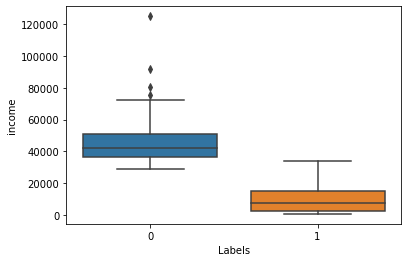

In [38]:
## Plotting boxplot for income
sns.boxplot(x='Labels',y='income',data=df)

<AxesSubplot:xlabel='Labels', ylabel='child_mort'>

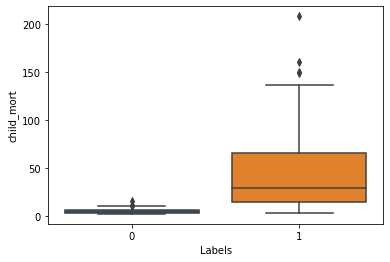

In [39]:
## Plotting boxplot for child_mort
sns.boxplot(x='Labels',y='child_mort',data=df)

<AxesSubplot:xlabel='Labels', ylabel='inflation'>

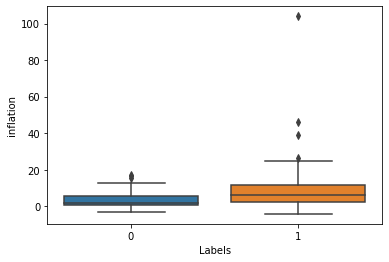

In [40]:
## Plotting boxplot for inflation
sns.boxplot(x='Labels',y='inflation',data=df)

<AxesSubplot:xlabel='Labels', ylabel='health'>

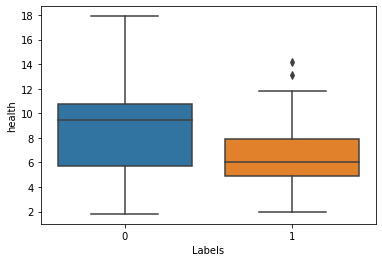

In [41]:
## Plotting boxplot for health
sns.boxplot(x='Labels',y='health',data=df)

<AxesSubplot:xlabel='Labels', ylabel='exports'>

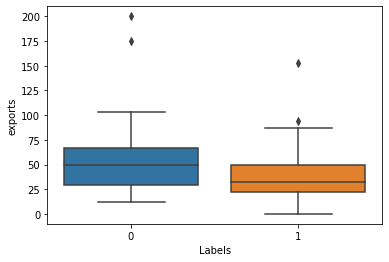

In [42]:
## Plotting boxplot for exports
sns.boxplot(x='Labels',y='exports',data=df)

#### Considering the sihouette score and elbow curve-Reclustering the number of clusters to be formed as 4

In [43]:
## Considering 4 clusters
kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(df_new)

In [44]:
kmeans.cluster_centers_

array([[5.41351852e+01, 3.32573981e+01, 6.32157407e+00, 4.55385731e+01,
        6.38113889e+03, 9.20411111e+00, 6.65666667e+01, 3.51981481e+00,
        3.02725926e+03],
       [5.04285714e+00, 5.55285714e+01, 9.37380952e+00, 4.72095238e+01,
        4.75714286e+04, 2.76814286e+00, 8.04571429e+01, 1.77761905e+00,
        4.60857143e+04],
       [5.00000000e+00, 9.23333333e+01, 6.35333333e+00, 6.47666667e+01,
        9.30000000e+04, 5.51666667e+00, 8.06000000e+01, 1.88333333e+00,
        8.77000000e+04],
       [1.21028571e+01, 5.22942857e+01, 6.84514286e+00, 4.93371429e+01,
        2.56000000e+04, 6.59545714e+00, 7.60628571e+01, 1.97685714e+00,
        1.73477143e+04]])

In [45]:
labels=kmeans.labels_

In [46]:
df['Labels_4']=labels

<AxesSubplot:xlabel='Labels_4', ylabel='child_mort'>

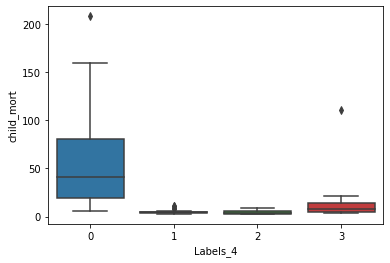

In [47]:
sns.boxplot(x='Labels_4',y='child_mort',data=df)

<AxesSubplot:xlabel='Labels_4', ylabel='gdpp'>

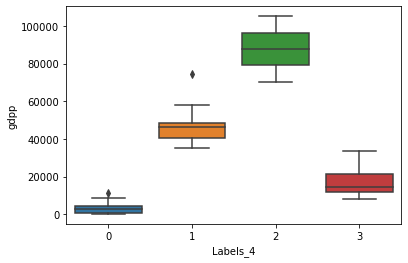

In [48]:
sns.boxplot(x='Labels_4',y='gdpp',data=df)

<AxesSubplot:xlabel='Labels_4', ylabel='income'>

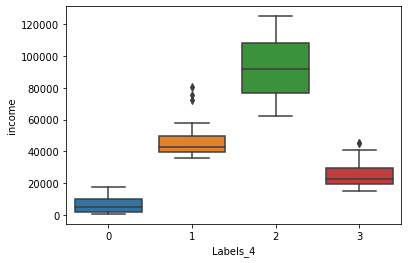

In [49]:
sns.boxplot(x='Labels_4',y='income',data=df)

In [50]:
df.Labels_4.value_counts()

0    108
3     35
1     21
2      3
Name: Labels_4, dtype: int64

#### Hierarchical clustering

In [51]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [52]:
## single hierarchical clustering
mergings=linkage(df_new,method='single',metric='euclidean')

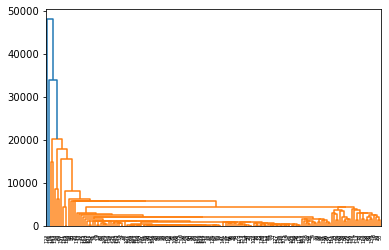

In [53]:
d=dendrogram(mergings)

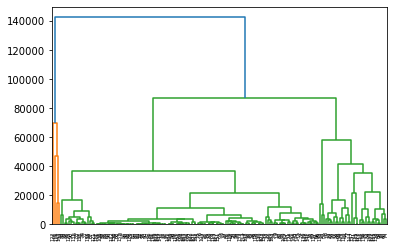

In [54]:
## Complete hierarchical clustering
mergings_1=linkage(df_new,method='complete',metric='euclidean')
dend=dendrogram(mergings_1)

In [55]:
labels_hier=cut_tree(mergings_1,n_clusters=6)

In [56]:
df['Labels_hierarchy']=labels_hier

In [57]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels,Labels_4,Labels_hierarchy
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,3,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0,0


In [58]:
df['Labels_hierarchy'].value_counts()

0    129
1     31
2      3
4      2
5      1
3      1
Name: Labels_hierarchy, dtype: int64

In [59]:
df[['gdpp','child_mort','income']]

,gdpp,child_mort,income
0,553,90.2,1610
1,4090,16.6,9930
2,4460,27.3,12900
3,3530,119.0,5900
4,12200,10.3,19100
...,...,...,...
162,2970,29.2,2950
163,13500,17.1,16500
164,1310,23.3,4490
165,1310,56.3,4480


<AxesSubplot:xlabel='Labels_hierarchy', ylabel='gdpp'>

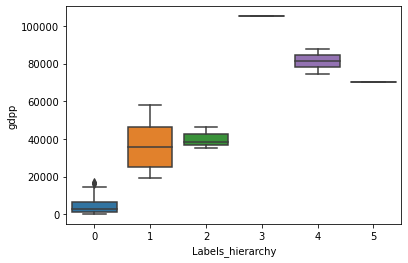

In [60]:
sns.boxplot(x=df['Labels_hierarchy'],y=df.gdpp)

<AxesSubplot:xlabel='Labels_hierarchy', ylabel='child_mort'>

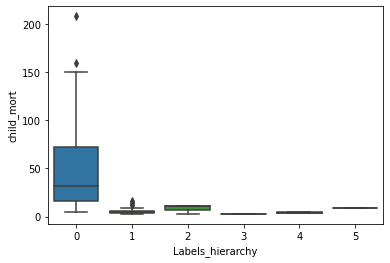

In [61]:
sns.boxplot(x=df['Labels_hierarchy'],y=df.child_mort)

<AxesSubplot:xlabel='Labels_hierarchy', ylabel='income'>

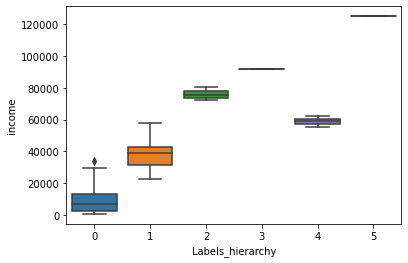

In [62]:
sns.boxplot(x=df['Labels_hierarchy'],y=df.income)

## Removing Outliers from the dataset

In [63]:
###income column
Q1=df_new.income.quantile(0.05)
Q2=df_new.income.quantile(0.95)
IQR=Q2-Q1


In [64]:
df_new=df_new[(df_new.income>=Q1-1.5*IQR)&(df_new.income<=Q2+1.5*IQR)]

In [65]:
##gdpp
Q1=df_new.gdpp.quantile(0.5)
Q2=df_new.gdpp.quantile(0.95)
IQR=Q2-Q1
df_new=df_new[(df_new.gdpp>=Q1-1.5*IQR)&(df_new.gdpp<=Q2+1.5*IQR)]

In [66]:
###child_mort
Q1=df_new.child_mort.quantile(0.5)
Q2=df_new.child_mort.quantile(0.95)
IQR=Q2-Q1
df_new=df_new[(df_new.child_mort>=Q1-1.5*IQR)&(df_new.child_mort<=Q2+1.5*IQR)]

In [67]:
df_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


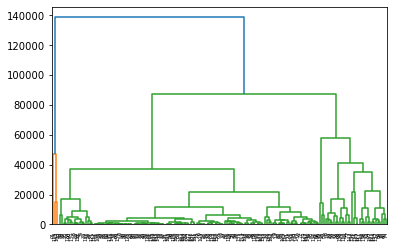

In [68]:
### After removing the outliers
mergings2=linkage(df_new,method='complete',metric='euclidean')
de=dendrogram(mergings2)

In [69]:
## using 6 clusters from the 
labels_hier=cut_tree(mergings2,n_clusters=6)

In [70]:
df_new['Labels_hierarchy']=labels_hier

<AxesSubplot:xlabel='Labels_hierarchy', ylabel='gdpp'>

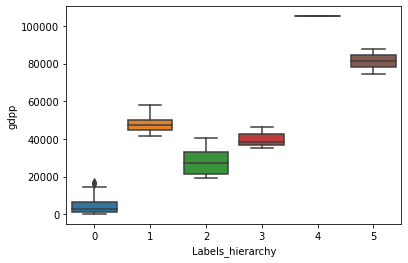

In [71]:
sns.boxplot(x=df_new['Labels_hierarchy'],y=df.gdpp)

<AxesSubplot:xlabel='Labels_hierarchy', ylabel='child_mort'>

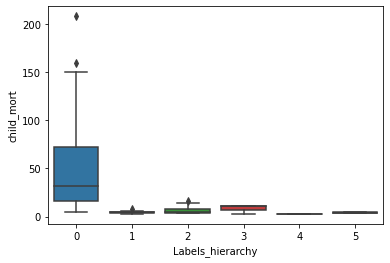

In [72]:
sns.boxplot(x=df_new['Labels_hierarchy'],y=df.child_mort)

<AxesSubplot:xlabel='Labels_hierarchy', ylabel='income'>

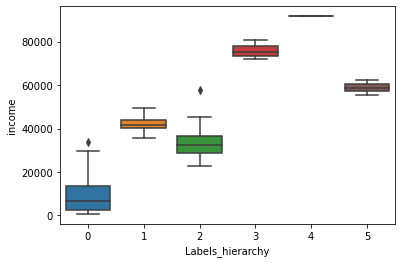

In [73]:
sns.boxplot(x=df_new['Labels_hierarchy'],y=df.income)

In [74]:
df_new[df_new['Labels_hierarchy']==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels_hierarchy
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [75]:
df_new['Labels_hierarchy'].value_counts()

0    129
2     18
1     13
3      3
5      2
4      1
Name: Labels_hierarchy, dtype: int64

### No much difference is observed after outlier elimination

- K-means technique with 4 clusters offers better insigths from the plot ,hence proceeding with that

In [76]:
df.Labels_4.value_counts()

0    108
3     35
1     21
2      3
Name: Labels_4, dtype: int64

In [77]:
df.groupby(by='Labels_4').aggregate({'child_mort':'mean','income':'mean','gdpp':'mean'})

,child_mort,income,gdpp
Labels_4,,,
0,54.135185,6381.138889,3027.259259
1,5.042857,47571.428571,46085.714286
2,5.000000,93000.000000,87700.000000
3,12.102857,25600.000000,17347.714286


In [78]:
df_mort=df[df['Labels_4']==0].sort_values(by='child_mort',ascending=False).head(20)

In [79]:
df_income=df[df['Labels_4']==0].sort_values(by='income',ascending=True).head(20)

In [80]:
df_gdpp=df[df['Labels_4']==0].sort_values(by='gdpp',ascending=True).head(20)

In [81]:
df_merge=pd.merge(df_mort,df_income,how='inner',on='country')

In [82]:
df_merge=pd.merge(df_merge,df_gdpp,how='inner',on='country')

In [83]:
df_merge.country

0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object

<AxesSubplot:xlabel='income', ylabel='gdpp'>

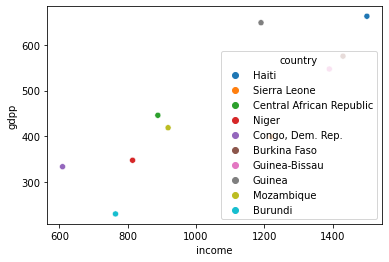

In [84]:
sns.scatterplot(df_merge.income,df_merge.gdpp,hue=df_merge.country)

<AxesSubplot:xlabel='gdpp', ylabel='child_mort'>

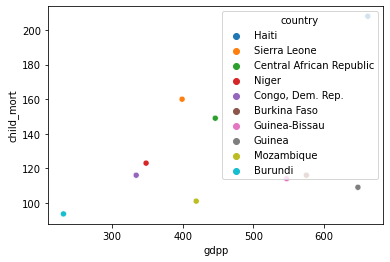

In [85]:
sns.scatterplot(df_merge.gdpp,df_merge.child_mort,hue=df_merge.country)

<AxesSubplot:xlabel='income', ylabel='child_mort'>

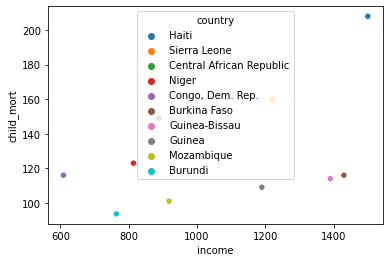

In [86]:
sns.scatterplot(df_merge.income,df_merge.child_mort,hue=df_merge.country)

### Below are the following countries which are in direst need of aid

-                       Haiti
-                Sierra Leone
-    Central African Republic
-                      Niger
-           Congo, Dem. Rep.
-                Burkina Faso
-               Guinea-Bissau
-                      Guinea
-                  Mozambique
-                     Burundi